# Eksik Veriler

1. MCAR — Missing Completely at Random (Tamamen rastgele eksik veri)

Eksikliğin hiçbir şeyle ilişkisi yok . Yani eksik olma ihtimali tamamen şans eseri.

**ÖR:** Anket formunun bazı kopyaları yazıcıdan hatalı çıkmış, bazı sorular boş kalmış; bu boşluklar rastgele kişilere denk gelmiş.

- En güvenli durum → Veriyi silmek (listwise deletion) bile çoğunlukla bias yaratmaz.

2. MAR — Missing at Random (Koşullu rastgele eksik veri)

Eksikliğin nedeni gözlemlenen diğer değişkenlerle ilişkili, ama eksik değerin kendisiyle ilişkili değil.

**ÖR:** Gelir verisi eksik, ancak eksiklik kişinin eğitim seviyesiyle ilişkili. Eğitim verisi elimizde olduğu için eksikliğin nedeni tahmin edilebilir.

- Eksik değerleri tahmin etmek için imputation (ortalama, medyan, regresyon, MICE vb.) yapılabilir.

3. MNAR — Missing Not at Random (Rastgele olmayan eksik veri)

Eksikliğin nedeni eksik değerin kendisiyle ilişkili (ya da ölçülemeyen başka bir değişkenle).

**ÖR:** Yüksek gelirli insanlar gelirlerini açıklamak istemiyor; yani eksiklik “yüksek gelir” ile doğrudan ilişkili.

- En zor durum — eksiklikte sistematik bir bias var. Modelleme öncesinde özel istatistiksel yöntemler (örn. Heckman correction) veya domain bilgisi gerekir.


### ÖZET TABLO

| Tür  | Açıklama         | İlişkili olduğu şey                              | Örnek                                    | Müdahale                     |
| ---- | ---------------- | ------------------------------------------------ | ---------------------------------------- | ---------------------------- |
| MCAR | Tamamen rastgele | Hiçbir şey                                       | Rastgele eksik anket cevapları           | Silme/imputation yapılabilir |
| MAR  | Koşullu rastgele | Gözlemlenen diğer değişkenler                    | Gelir verisi, eğitim düzeyine göre eksik | İmputation uygun             |
| MNAR | Rastgele olmayan | Eksik değerin kendisi / gözlemlenemeyen değişken | Yüksek gelir gizleniyor                  | Özel yöntem + domain bilgisi |


In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [5]:
df.shape

(891, 15)

In [6]:
df.dropna().shape #tüm eksik verileri atarsak kalan veri boyutu

(182, 15)

In [7]:
df.dropna(axis = 1) # eksik veri olan kolonları tamamen siler

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


### IMPUTATION

In [8]:
# mean inputation

<Axes: xlabel='age', ylabel='Count'>

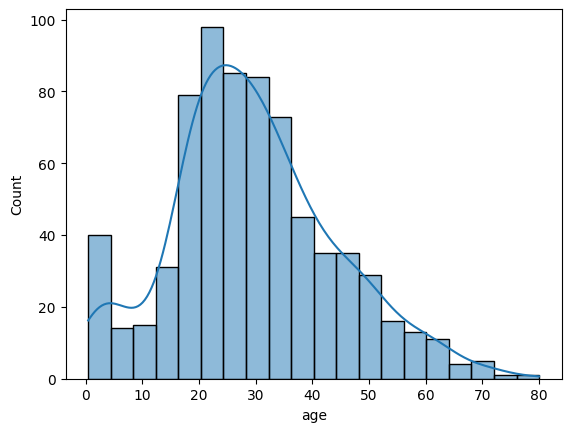

In [9]:
sns.histplot(data=df["age"], kde=True)

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df["Age_mean"] = df["age"].fillna(df["age"].mean())
# 'fillna' ile içine hangi değerleri koyacağımızı yazıyoruz

In [12]:
df[["Age_mean", "age"]]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: ylabel='age'>

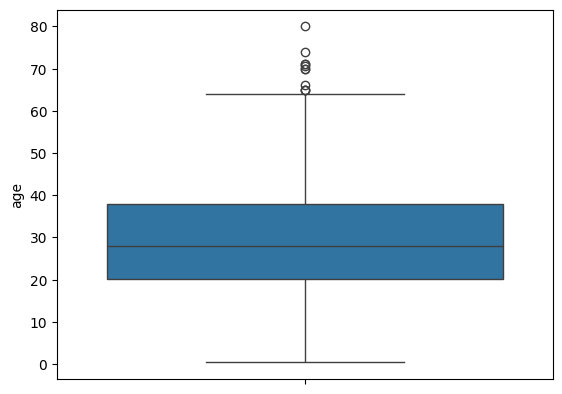

In [13]:
# eğer data'da çok çıkıntı varsa yani aykırı değer, o zaman mean ile doldurmak daha mantıklı

sns.boxplot(data=df, y = "age")

In [14]:
#median

df["age_median"] = df["age"].fillna(df["age"].median())

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [16]:
df[["age_median","Age_mean","age"]]

,age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [17]:
# mod  -> kategorik değerlerde uygularız

In [18]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [19]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
mode_value = df[df["embarked"].notna()]["embarked"].mode()[0]
#boş olmayanların modunu al

In [21]:
df["embarked_mode"] = df["embarked"].fillna(mode_value)
# eksik kategorik sütunları mod ile doldur

In [22]:
df[["embarked_mode", "embarked"]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [23]:
df["embarked_mode"].isnull().sum()

np.int64(0)

## DENGESİZ VERİ SETİ (BALANCING DATA)



In [24]:
#random seed
import numpy as np
np.random.seed(42) # tutarlı rastgelelik için kullanılır

set1no = 900
set2no = 100

In [25]:
# dataset üretiyoruz
df1 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set1no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set1no),
    "target": [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set2no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set2no),
    "target": [1] * set2no
})

In [26]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [27]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [28]:
df = pd.concat([df1, df2]).reset_index(drop=True)

In [29]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [30]:
df["target"].unique()

array([0, 1])

In [31]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [32]:
# upsampling -> upsample minority (azınlık olanları arttır)
# downsampling -> downsample majority (çoğunlukları azaltmak)

In [33]:
df_minority = df[df["target"] == 1] #target 1 olanları minoritye ata

In [34]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [35]:
df_majority = df[df["target"] == 0]

In [36]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [37]:
from sklearn.utils import resample

In [38]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples = len(df_majority), random_state = 42)
#azınlık sınıfına ait verileri al, aynı örneğin birden fazla seçilmesine izin ver, azınlık sınıf çoğunluk sınıfa ulaşana kadar çoğalt, aynı sonuçları tekrar elde etmek için sabit 42 değeri

In [39]:
df_minority_upsampled.shape

(900, 3)

In [40]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1


In [41]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# çoğunluk sınıfı ile çoğaltılmış azınlık sınıfı birleştirip, yeni dengeli bir veri seti oluştur

In [42]:
df_upsampled["target"].value_counts()
#dengeli veri setinde target sınıf dağılımını sayıyor

target
0    900
1    900
Name: count, dtype: int64

In [43]:
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority),random_state=42)

In [44]:
df_majority_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [45]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [46]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

## SMOTE (Synthetic Minority Over,sampling Technique)

In [47]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


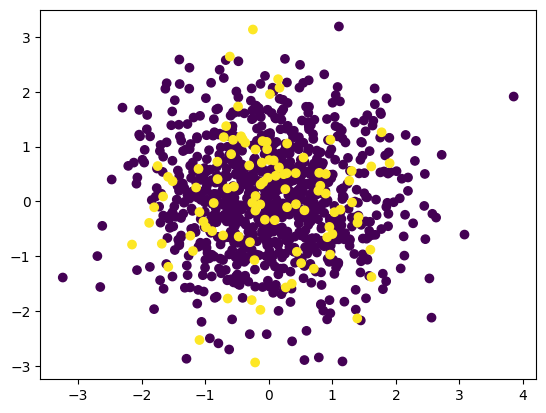

In [48]:
import matplotlib.pyplot as plt

plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

In [49]:
!pip install --upgrade scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE

In [50]:
oversample = SMOTE()

In [53]:
(X, y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df["target"])

In [54]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.701868,-0.173309
1796,1.545917,-1.335943
1797,1.358114,-0.225781
1798,0.486916,-0.147628


In [55]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [56]:
type(X)

pandas.core.frame.DataFrame

In [57]:
type(y)

pandas.core.series.Series

In [58]:
oversample_df = pd.concat([X,y],axis = 1)

In [59]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

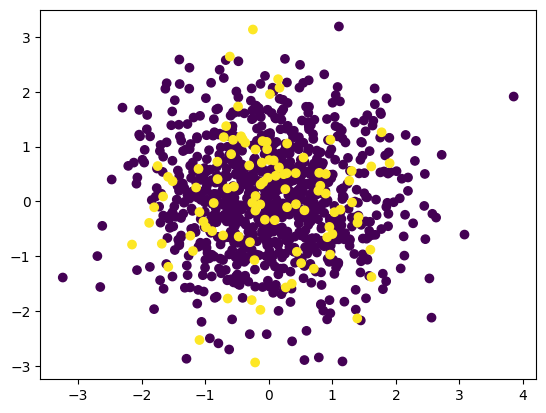

In [60]:
plt.scatter(df["feature_1"], df["feature_2"], c = df["target"])

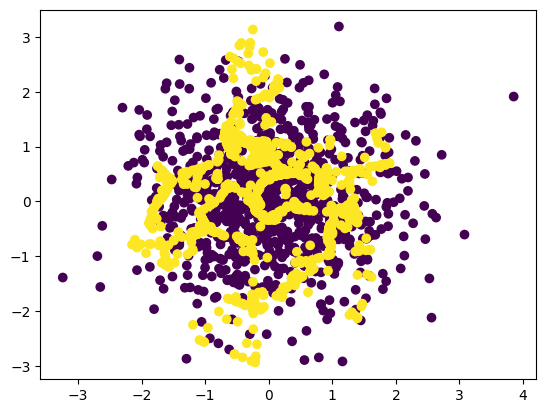

In [62]:
plt.scatter(oversample_df["feature_1"], oversample_df["feature_2"], c = oversample_df["target"])

## DATA ENCODING

**1. One-Hot Encoding**

Bir sütunda yazan kategorileri (örneğin renkler) alıp, her bir kategori için ayrı bir sütun açar ve o satırın ait olduğu kategoriye 1, diğerlerine 0 yazar. 
| Renk  | Red | Green | Blue |
| ----- | --- | ----- | ---- |
| Red   | 1   | 0     | 0    |
| Green | 0   | 1     | 0    |
| Blue  | 0   | 0     | 1    |

- Avantaj: Kategorilerin sıralı olduğu anlamını vermez.
- Dezavantaj: Çok kategori varsa sütun patlaması (curse of dimensionality).

**2. Label Encoding**

Kategorileri sayılarla temsil eder. Her kategoriye bir sayı verilir.
| Renk  | Kod |
| ----- | --- |
| Red   | 0   |
| Green | 1   |
| Blue  | 2   |

- Avantaj: Basit ve hızlı. Tek sütun kullanır, fazla yer kaplamaz.
- Dezavantaj: Sayılar sıralıymış gibi algılanabilir.

**3. Ordinal Encoding**

Kategorilere mantıksal veya doğal bir sıralama olduğu durumlarda sayılar verilir.
Burada sayıların sırası anlam taşır.

| Beden  | Kod |
| ------ | --- |
| Small  | 1   |
| Medium | 2   |
| Large  | 3   |

- Avantajı: Sıralı kategorileri sayısal olarak temsil etmek kolay ve hızlıdır.
- Dezavantajı: Sıralama mantıklı değilse (örn. renkler), yanlış anlam çıkarabilir.

**4. Frequency Encoding**

Kategorileri, veri setinde kaç kez geçtiği ile temsil eder.
Yani her kategori yerine o kategorinin frekansını (görülme sayısını) yazarız.
| Renk  | Frekans |
| ----- | ------- |
| Red   | 3       |
| Blue  | 1       |
| Red   | 3       |
| Green | 1       |
| Red   | 3       |
- Avantajı: Çok kategori varsa bile tek sütunda kalır. One-Hot gibi sütun patlaması olmaz.
- Dezavantajı: Model, frekansı “büyüklük” gibi yorumlayabilir (Red’in değeri 3 → daha önemli sanabilir).

**5. Target Encoding (Mean Encoding)**

Her kategori, hedef değişkenin (target) ortalamasıyla temsil edilir.
Yani kategorinin yerine, o kategorinin hedef değeri üzerindeki ortalama etkisini yazarız.

| Renk  | Target |
| ----- | ------ |
| Red   | 1      |
| Red   | 0      |
| Blue  | 1      |
| Green | 0      |
| Red   | 1      |
| Green | 1      |

Ortalama Target değeri:

Red → (1 + 0 + 1) / 3 = 0.67

Blue → (1) / 1 = 1.00

Green → (0 + 1) / 2 = 0.50

| Renk  | Target Encoding |
| ----- | --------------- |
| Red   | 0.67            |
| Red   | 0.67            |
| Blue  | 1.00            |
| Green | 0.50            |
| Red   | 0.67            |
| Green | 0.50            |

- Avantajı: Kategorik değişkenleri tek sütunda sayısal hale getirir. Özellikle çok kategori varsa işe yarar.
- Dezavantajı: Data leakage riski vardır → Train/Test ayrımına dikkat edilmezse model geleceği “çaktırmadan” öğrenmiş olur.

**6. Binary Encoding**

Önce her kategoriye bir sayı verilir (Label Encoding gibi), sonra bu sayı ikilik (binary) sisteme çevrilir.
Her bir basamak (0 veya 1) ayrı sütun olur.

| Renk   | Sayı (Label) | Binary | Sütun1 | Sütun2 | Sütun3 |
| ------ | ------------ | ------ | ------ | ------ | ------ |
| Red    | 1            | 001    | 0      | 0      | 1      |
| Green  | 2            | 010    | 0      | 1      | 0      |
| Blue   | 3            | 011    | 0      | 1      | 1      |
| Yellow | 4            | 100    | 1      | 0      | 0      |

- Avantajı: One-Hot’tan daha az sütun oluşur (özellikle çok kategori varsa). Bellek tasarrufu sağlar.
- Dezavantajı: Sayısal temsil olduğu için bazı modeller yanlış sıralama ilişkisi kurabilir.

In [63]:
# Encoding Data

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [83]:
df = sns.load_dataset("titanic")

In [84]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [86]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [87]:
df = df.dropna(subset = ['embark_town'])

In [88]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [89]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    0
dtype: int64

In [90]:
#one hot encoding

In [91]:
df["sex"].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [92]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [93]:
df["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [95]:
df_onehot = pd.get_dummies(df,columns = ["sex", "embark_town"], drop_first = True)

In [96]:
df_onehot

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,yes,True,True,False,False


In [97]:
df_onehot.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [98]:
# label encoder

In [99]:
label_encoder = LabelEncoder()

In [100]:
df_label = df.copy()

In [101]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [102]:
df_label["sex"] = label_encoder.fit_transform(df_label["sex"])

In [103]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [104]:
# ordinal encoder

In [105]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
df_ordinal = df.copy()

In [109]:
class_order = ["Third", "Second", "First"]

In [110]:
ordinal_encoder = OrdinalEncoder(categories = [class_order])

In [111]:
df_ordinal["class"] = ordinal_encoder.fit_transform(df_ordinal[["class"]])

In [113]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'One Hot Encoding'}, xlabel='sex_male'>

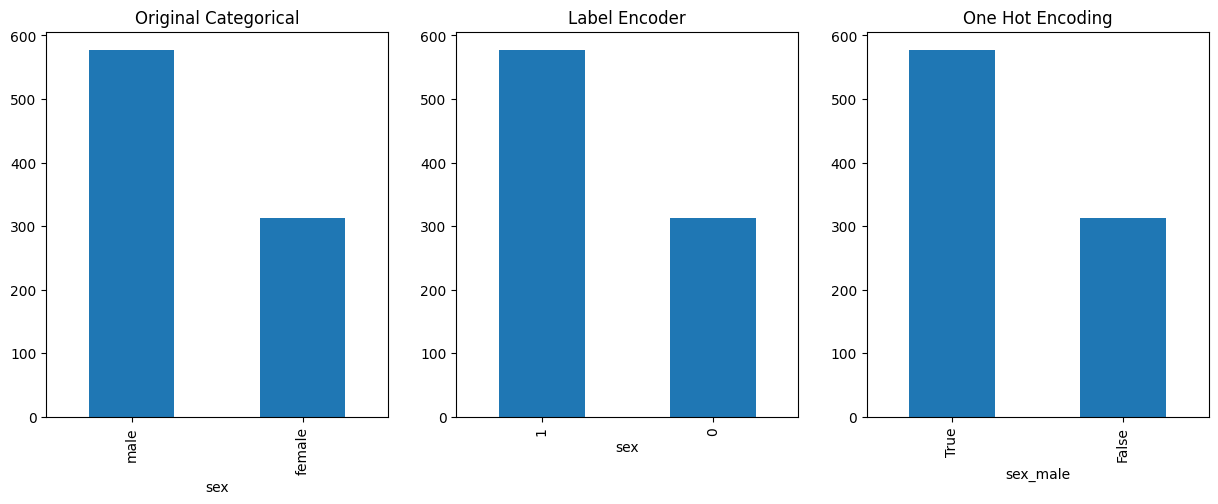

In [117]:
fig, axes = plt.subplots(1,3, figsize= (15,5))
df["sex"].value_counts().plot(kind = "bar", ax = axes[0], title = "Original Categorical")
df_label["sex"].value_counts().plot(kind = "bar", ax = axes[1], title = "Label Encoder")
df_onehot["sex_male"].value_counts().plot(kind = "bar", ax = axes[2], title = "One Hot Encoding")